# Orientation

In [2]:
%load_ext autoreload
%autoreload 2

In [9]:
import cv2
import numpy as np
def rotate_image(image, angle):
    # Rotate the image by given angle in degrees
    center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)

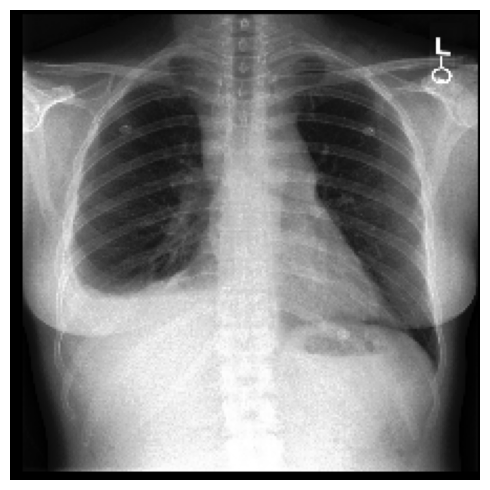

In [7]:
# Read image as grayscale

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image as grayscale
img = cv2.imread('../datasets/mimic-cxr-jpg/files/p11/p11002268/s51865072/a41f8198-de15ea4c-c296f762-721eef61-0288555e.jpg', cv2.IMREAD_GRAYSCALE)

# Resize image to 224x224
img_resized = cv2.resize(img, (224, 224))

# Display resized image using matplotlib without borders
plt.figure(figsize=(5, 5))  # Set figure size to 5x5 inches
plt.imshow(img_resized, cmap='gray')
plt.axis('off')  # Turn off axis numbers and ticks
plt.tight_layout()  # Ensure tight layout to remove padding
plt.show()

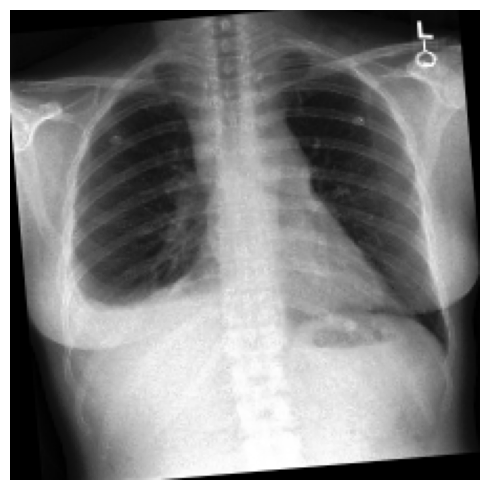

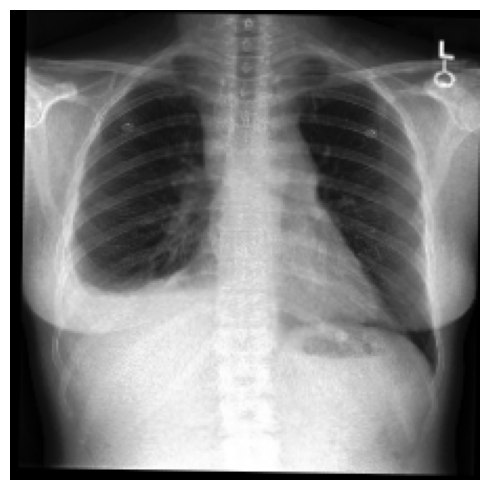

In [11]:
# Roatae image by 45 degrees
img_rotated_1 = rotate_image(img_resized, 5)
# Display resized image using matplotlib without borders
plt.figure(figsize=(5, 5))  # Set figure size to 5x5 inches
plt.imshow(img_rotated_1, cmap='gray')
plt.axis('off')  # Turn off axis numbers and ticks
plt.tight_layout()  # Ensure tight layout to remove padding
plt.show()

img_rotated_neg_1 = rotate_image(img_resized, -1)
# Display resized image using matplotlib without borders
plt.figure(figsize=(5, 5))  # Set figure size to 5x5 inches
plt.imshow(img_rotated_neg_1, cmap='gray')
plt.axis('off')  # Turn off axis numbers and ticks
plt.tight_layout()  # Ensure tight layout to remove padding
plt.show()

In [16]:

def template_matching_rotation(reference_image, image_to_correct, rotation_step=1):
    # Convert images to grayscale if necessary
    if len(reference_image.shape) == 3:
        reference_gray = cv2.cvtColor(reference_image, cv2.COLOR_BGR2GRAY)
    else:
        reference_gray = reference_image
    
    if len(image_to_correct.shape) == 3:
        image_gray = cv2.cvtColor(image_to_correct, cv2.COLOR_BGR2GRAY)
    else:
        image_gray = image_to_correct
    
    # Define rotation range
    min_angle = -10  # Example: rotate from -10 to +10 degrees
    max_angle = 10
    best_score = -np.inf
    best_angle = 0
    
    for angle in range(min_angle, max_angle + 1, rotation_step):
        rotated_image = rotate_image(image_gray, angle)
        
        # Perform template matching
        result = cv2.matchTemplate(rotated_image, reference_gray, cv2.TM_CCOEFF_NORMED)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
        
        # Track the best rotation angle
        if max_val > best_score:
            best_score = max_val
            best_angle = angle

    # Correct the image with the best found rotation angle
    corrected_image = rotate_image(image_to_correct, best_angle)
    
    return corrected_image, best_angle, best_score
    


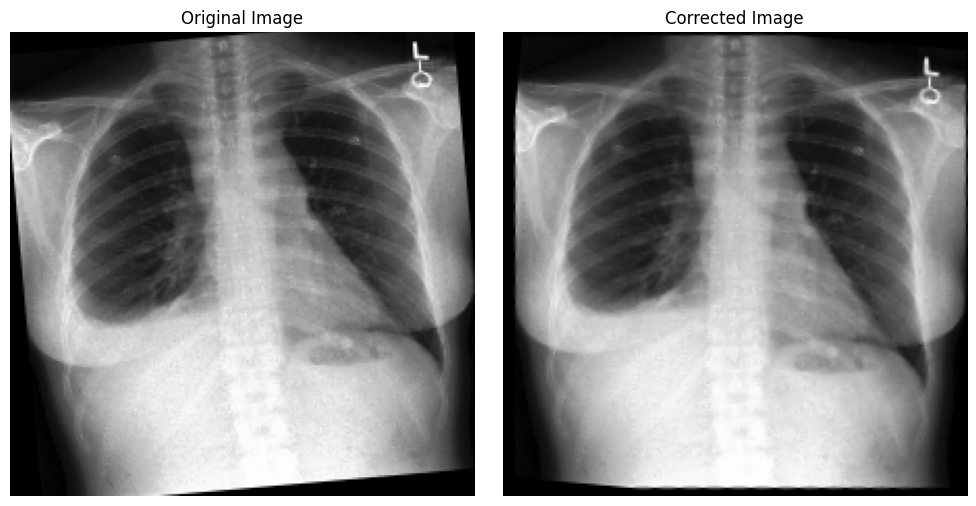

Best rotation angle: -5 degrees
Similarity score: 0.9953700304031372


In [24]:
corrected_image, best_rotation, similarity_score=template_matching_rotation(reference_image=img_resized, image_to_correct=img_rotated_1,  rotation_step=1)



# Display images using Matplotlib subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(cv2.cvtColor(img_rotated_1, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(corrected_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Corrected Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print(f"Best rotation angle: {best_rotation} degrees")
print(f"Similarity score: {similarity_score}")

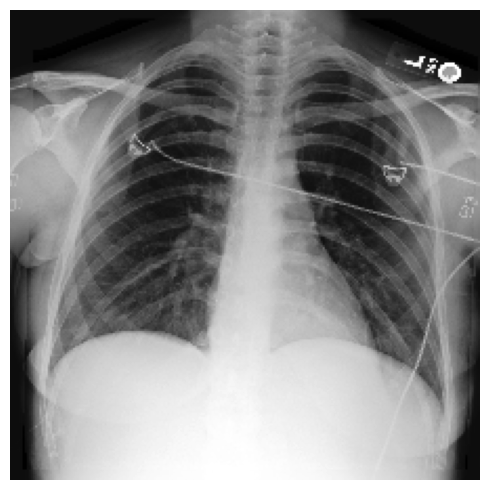

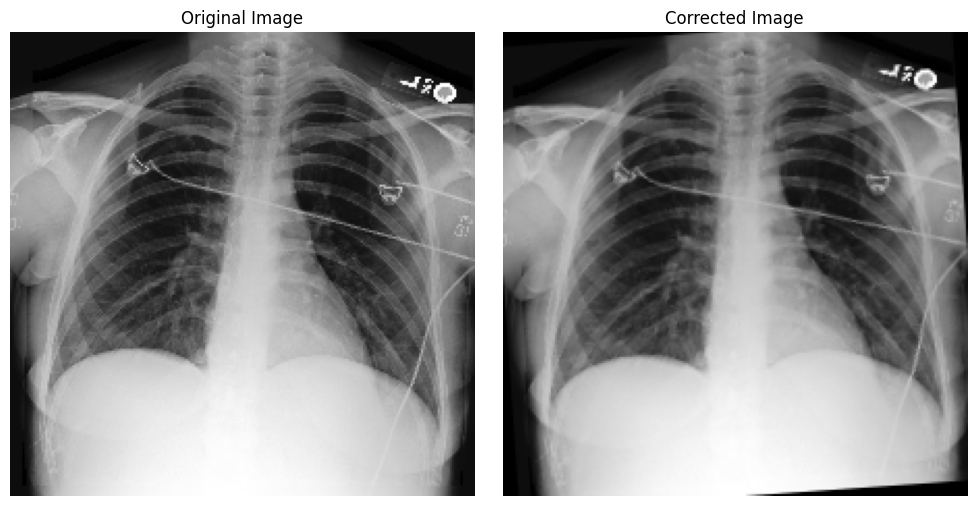

Best rotation angle: 4 degrees
Similarity score: 0.7354110479354858


In [25]:
# Load image as grayscale
img_2 = cv2.imread('../datasets/mimic-cxr-jpg/files/p11/p11002268/s59019041/174a3be8-3b3995cb-082433d9-b99dbd44-e4003ccb.jpg', cv2.IMREAD_GRAYSCALE)

# Resize image to 224x224
img_2_resized = cv2.resize(img_2, (224, 224))

# Display resized image using matplotlib without borders
plt.figure(figsize=(5, 5))  # Set figure size to 5x5 inches
plt.imshow(img_2_resized, cmap='gray')
plt.axis('off')  # Turn off axis numbers and ticks
plt.tight_layout()  # Ensure tight layout to remove padding
plt.show()



corrected_image, best_rotation, similarity_score=template_matching_rotation(reference_image=img_resized, image_to_correct=img_2_resized,  rotation_step=1)

# Display images using Matplotlib subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(cv2.cvtColor(img_2_resized, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(corrected_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Corrected Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print(f"Best rotation angle: {best_rotation} degrees")
print(f"Similarity score: {similarity_score}")

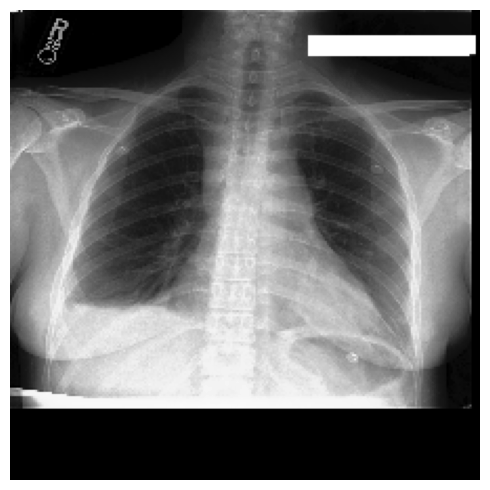

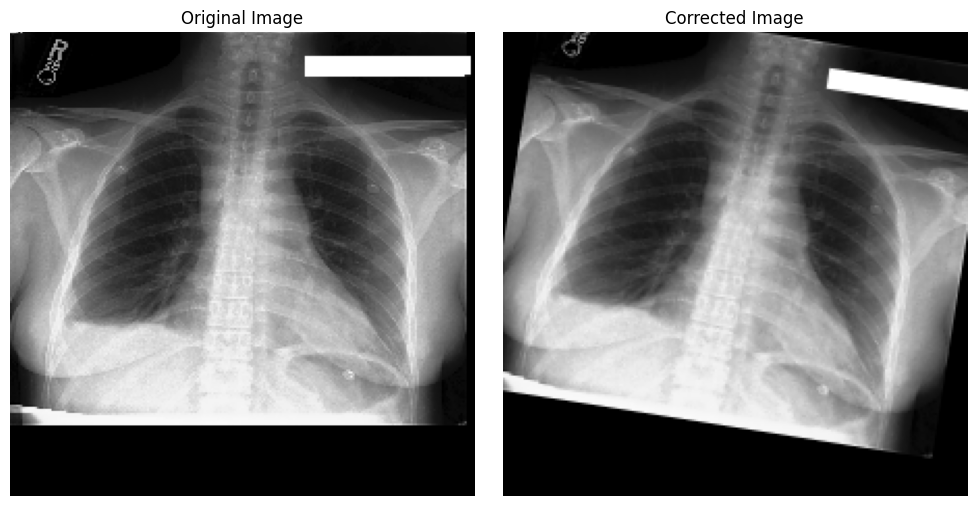

Best rotation angle: -9 degrees
Similarity score: 0.4975601136684418


In [26]:
# Load image as grayscale
img_2 = cv2.imread('../datasets/mimic-cxr-jpg/files/p11/p11002268/s54179830/f513cdc0-df9a7a2d-3cd4998a-f2aab26a-05217b47.jpg', cv2.IMREAD_GRAYSCALE)

# Resize image to 224x224
img_2_resized = cv2.resize(img_2, (224, 224))

# Display resized image using matplotlib without borders
plt.figure(figsize=(5, 5))  # Set figure size to 5x5 inches
plt.imshow(img_2_resized, cmap='gray')
plt.axis('off')  # Turn off axis numbers and ticks
plt.tight_layout()  # Ensure tight layout to remove padding
plt.show()



corrected_image, best_rotation, similarity_score=template_matching_rotation(reference_image=img_resized, image_to_correct=img_2_resized,  rotation_step=1)

# Display images using Matplotlib subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(cv2.cvtColor(img_2_resized, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(corrected_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Corrected Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print(f"Best rotation angle: {best_rotation} degrees")
print(f"Similarity score: {similarity_score}")

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def rotate_image(image, angle):
    # Rotate the image by given angle in degrees
    center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)

def template_matching_rotation_translation(reference_image, image_to_correct, rotation_range=(-10, 10), rotation_step=1):
    # Convert images to grayscale if necessary
    if len(reference_image.shape) == 3:
        reference_gray = cv2.cvtColor(reference_image, cv2.COLOR_BGR2GRAY)
    else:
        reference_gray = reference_image
    
    if len(image_to_correct.shape) == 3:
        image_gray = cv2.cvtColor(image_to_correct, cv2.COLOR_BGR2GRAY)
    else:
        image_gray = image_to_correct
    
    # Initialize variables to track best transformation
    best_score = -np.inf
    best_angle = 0
    best_translation = (0, 0)
    
    # Iterate over rotation angles
    for angle in range(rotation_range[0], rotation_range[1] + 1, rotation_step):
        rotated_image = rotate_image(image_gray, angle)
        
        # Perform translation search
        height, width = rotated_image.shape
        search_range = 10  # Adjust as needed for translation search range
        for dx in range(-search_range, search_range + 1):
            for dy in range(-search_range, search_range + 1):
                translated_image = np.roll(rotated_image, dx, axis=1)
                translated_image = np.roll(translated_image, dy, axis=0)
                
                # Perform template matching
                result = cv2.matchTemplate(translated_image, reference_gray, cv2.TM_CCOEFF_NORMED)
                _, max_val, _, _ = cv2.minMaxLoc(result)
                
                # Track the best transformation
                if max_val > best_score:
                    best_score = max_val
                    best_angle = angle
                    best_translation = (dx, dy)
    
    # Apply the best transformation to the original image
    corrected_image = rotate_image(image_to_correct, best_angle)
    corrected_image = np.roll(corrected_image, best_translation[0], axis=1)
    corrected_image = np.roll(corrected_image, best_translation[1], axis=0)
    
    return corrected_image, best_angle, best_translation, best_score

# Example usage:
if __name__ == "__main__":
    reference_image = cv2.imread('../datasets/mimic-cxr-jpg/files/p11/p11002268/s51865072/a41f8198-de15ea4c-c296f762-721eef61-0288555e.jpg', cv2.IMREAD_GRAYSCALE)
    image_to_correct = cv2.imread('../datasets/mimic-cxr-jpg/files/p11/p11002268/s59019041/174a3be8-3b3995cb-082433d9-b99dbd44-e4003ccb.jpg', cv2.IMREAD_GRAYSCALE)
    
    corrected_image, best_rotation, best_translation, similarity_score = template_matching_rotation_translation(reference_image, image_to_correct)
    
    # Display images using Matplotlib subplots
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    axes[0].imshow(cv2.cvtColor(image_to_correct, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    
    axes[1].imshow(cv2.cvtColor(corrected_image, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Corrected Image')
    axes[1].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print(f"Best rotation angle: {best_rotation} degrees")
    print(f"Best translation (dx, dy): {best_translation}")
    print(f"Similarity score: {similarity_score}")
